In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\nivet\Downloads\archive (3)\insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Getting the shape of the dataset

In [6]:
print(f'The number of rows and coulmns are {data.shape[0],data.shape[1]} respectively')

The number of rows and coulmns are (1338, 7) respectively


### Getting the gist of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Check for null-values

In [8]:
print(f'Are there any null values? {data.isnull().values.any()}')

Are there any null values? False


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

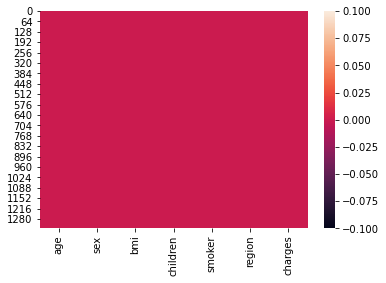

In [10]:
sns.heatmap(data.isnull())

### Get the overall stats of the dataset

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# to include stats for non-numerical columns as well
data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [13]:
# we need to convert because ML algorithms only process numerical values
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [15]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [16]:
data['sex'].unique()

array([0, 1], dtype=int64)

In [17]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
data['smoker'] = data['smoker'].map({'no':0,'yes':1})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
data['region'] = data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### Store Feature Matrix In X and Response(Target) In Vector y

In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
# independant variables
X = data.drop(['charges'],axis = 1)

In [25]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [26]:
# Dependant variable
y = data['charges']

In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train/Test split
          1. Split data into two-part: a training set and a testing set
          2. Train the model(s) on the training set
          3. Test the Model(s) on the Testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Import the models

In [30]:
# This is a regression model as the values of the dependant variables are continuous
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model Training

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

### Prediction on Test Data

In [32]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [33]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,12148.745847,11001.128629
887,5272.17580,7116.295018,9492.515425,5358.620744,5840.174656
890,29330.98315,36909.013521,9648.758701,28274.496056,28001.980112
1293,9301.89355,9507.874691,9555.044136,10571.860958,9745.291602
259,33750.29180,27013.350008,9420.421978,34421.448675,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47093.451570,45431.423211
575,12222.89830,11814.555568,9625.431547,12184.335479,12465.025294
535,6067.12675,7638.107736,9504.168517,6429.755427,6974.336525
543,63770.42801,40959.081722,9605.004594,46572.818308,47862.047791


### Compare Performance visually

In [34]:
import matplotlib.pyplot as plt

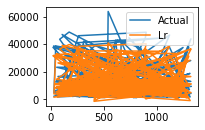

In [35]:
# Visualizing 4 plots, Actual values vs the other values
plt.subplot(221)
plt.plot(df1['Actual'],label='Actual')
plt.plot(df1['Lr'],label='Lr')
plt.legend()

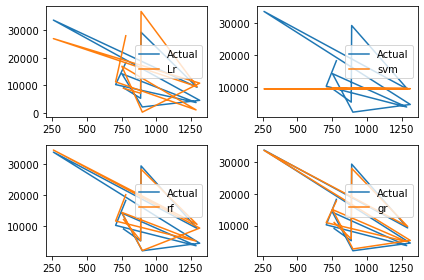

In [36]:
# this is difficult to comprehend, so, comparing the first few rows
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()
plt.tight_layout()

In [37]:
# Findings: Model 1 and 4 are closer to the actual values than the others

### Evaluating the Algorithm

In [38]:
from sklearn import metrics

In [39]:
# Evaluating using r-square, it measures the goodness of fit.
# Greater the value, the better the model
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [40]:
print(score1,score2,score3,score4,end="\n")

0.7833463107364538 -0.07229762787861826 0.8600312193006423 0.8779936181637191


In [41]:
# Findings : Model 4 is performing the best out of all

In [42]:
# Using mean absolute error, the lower the value the better
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [43]:
print(s1,s2,s3,s4,end='\n')

4186.5088983664355 8592.428727899724 2502.602840899672 2447.167158715136


In [44]:
# Findings : Model 4 is performing the best out of all

### Predict Charges for new customer

In [45]:
data = {'age':40,
       'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2
       }
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [46]:
new_pred = gr.predict(df)
print(new_pred)

[43013.23345491]


### Save Model Using Joblib

In [47]:
# The model should be saved so that it doesn't have to be re-trained everytime its used
# Before deployment, the model has to be tested on entire dataset, not just x_train and y_train
# training of x and y_train are only done to evalute the model and figure out the best one

In [48]:
# Training Gradient Boosting Model on entire dataset before deployment
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [49]:
import joblib

In [50]:
joblib.dump(gr,'model_insurance')

['model_insurance']

In [51]:
model = joblib.load('model_insurance')

In [52]:
model.predict(df)

array([42148.361888])

In [53]:
# There are 2 different predictions as the models have been trained on the full DF as well as a portion of it

### GUI

In [54]:
from tkinter import *

In [55]:
import joblib

In [56]:
window = Tk()
window.title('Insurance Cost Prediction')
label = Label(window, text = 'Insurance Cost Prediction', bg = 'black', fg = 'white').grid(row = 0,columnspan = 2)

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_insurance')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    Label(window,text='Insurance Cost').grid(row = 7)
    Label(window,text = result).grid(row = 8)
    
Label(window,text = 'Enter Your Age').grid(row = 1)
Label(window,text = 'Male/Female [1/0]').grid(row = 2)
Label(window,text = 'Enetr BMI value').grid(row = 3)
Label(window,text = 'Enter number of children').grid(row = 4)
Label(window,text = 'Smoker [Yes/No][1/0]').grid(row = 5)
Label(window,text = 'Region [1-4]').grid(row = 6)

e1 = Entry(window)
e2 = Entry(window)
e3 = Entry(window)
e4 = Entry(window)
e5 = Entry(window)
e6 = Entry(window)

e1.grid(row = 1,column = 1)
e2.grid(row = 2,column = 1)
e3.grid(row = 3,column = 1)
e4.grid(row = 4,column = 1)
e5.grid(row = 5,column = 1)
e6.grid(row = 6,column = 1)

Button(window,text='Predict',command = show_entry).grid()

window.mainloop()